In [4]:
from google.colab import auth 
auth.authenticate_user()

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/MyDrive/stock_prediction/Data/ETFs

/content/gdrive/MyDrive/stock_prediction/Data/ETFs


In [116]:
import os
import pandas as pd
from scipy import stats
pd.set_option('display.max_row', 600)
pd.set_option('display.max_columns', 100)

In [117]:
etf_path = '/content/gdrive/MyDrive/stock_prediction/Data/ETFs/'
etf_to_use = ['spy.us.txt', 'ivv.us.txt', 'vti.us.txt', 'qqq.us.txt', 'agg.us.txt']
etf_txt_files = [etf_path + etf_txt_file for etf_txt_file in etf_to_use]

In [118]:
#1. pandas에서 etf 데이터 읽어오기(시가, 고가, 저가, 종가, 거래량, OpenInt(제거 해야함))

etf_df_dict = {etf_txt_file : pd.read_csv(etf_txt_file) for etf_txt_file in etf_txt_files}
#etf_df_dict =   { k : etf_df_dict[k][:2982] for k in etf_df_dict.keys() }

In [11]:
## 결측치를 가지는 etf 데이터 확인 -> 결측치 없음 
for k,v in etf_df_dict.items() :
  if v.isna().sum().sum() > 0 : 
    print(k)

In [12]:
import matplotlib.pyplot as plt 

## 이상치를 가지는 etf 데이터 확인  -> 이상치가 어떤 오류에 의한 것인지 아니면 실제 가격인지 알 필요가 있음 
i = 0
outlier = {}
for k,v in etf_df_dict.items() :
  outlier[k] = (v.quantile(1.0) - v.quantile(0.5))/v.quantile(0.5)

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695]),
  array([ 59.334,  59.936,  60.043, ..., 258.67 , 258.85 , 259.11 ])),
 (44.496320440129004, 141.27528897219617, 0.9554098315620589))

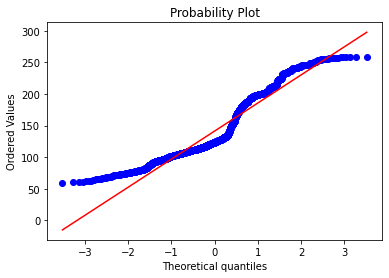

In [13]:
## spy의 종가의 데이터 분포에 대한 분석(Quantile Quantile Plot 사용) -> 정규 분포를 따른다고 보기 어려운 것 같음  
from scipy import stats
import pylab

spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']
stats.probplot(spy_df['Close'],dist='norm',plot=pylab)

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695]),
  array([ 59.195,  60.458,  60.555, ..., 258.3  , 258.47 , 258.97 ])),
 (44.47208792574568, 141.2585848172446, 0.9554278192820269))

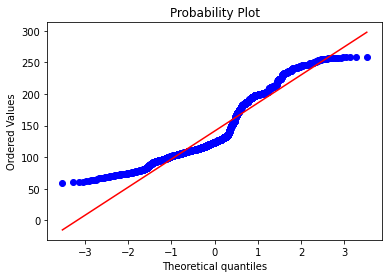

In [14]:
## spy의 시가의 데이터 분포에 대한 분석 (Quantile  Quantile Plot 사용) -> 정규 분포를 따른다고 보기 어려울 것 같음  
from scipy import stats 
import pylab

spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']
stats.probplot(spy_df['Open'], dist='norm', plot=pylab)

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695]),
  array([ 60.982,  61.374,  62.463, ..., 259.   , 259.22 , 259.35 ])),
 (44.41800651438183, 142.00711184004996, 0.954599094575259))

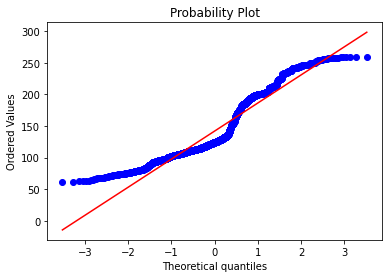

In [15]:
## spy의 고가의 데이터 분포에 대한 분석(Quantile Quantile Plot) -> 정규 분포를 따른다고 보기 어려울 것 같음 
from scipy import stats 
import pylab

spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']
stats.probplot(spy_df['High'],dist='norm',plot=pylab)

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695]),
  array([ 58.455,  59.003,  59.385, ..., 258.11 , 258.15 , 258.22 ])),
 (44.53436113305549, 140.4373555139019, 0.9561971646074657))

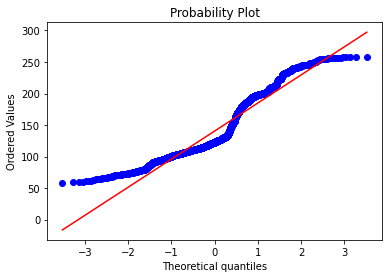

In [16]:
## spy의 저가의 데이터 분포에 대한 분석(Quantile Quantile Plot 사용) -> 정규 분포를 따른다고 보기 어려울 것 같음 
from scipy import stats
import pylab 

spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']
stats.probplot(spy_df['Low'],dist='norm',plot=pylab)

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695]),
  array([  17528276,   27476117,   28285839, ...,  890894046,  934589277,
         1000439720])),
 (107099991.58265354, 168053377.03311464, 0.9061660199891546))

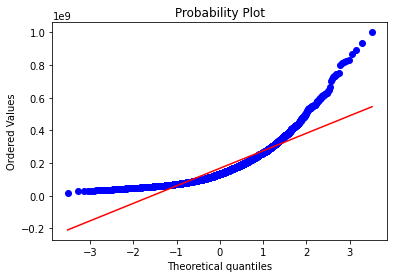

In [17]:
## spy의 거래량의 데이터 분포에 대한 분석(Quantile Quantile Plot 사용) -> 정규 분포를 따른다고 보기 어려울 것 같음 
from scipy import stats
import pylab 

spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']
stats.probplot(spy_df['Volume'],dist='norm',plot=pylab)

In [18]:
## spy의 시가와 종가 사이의 상관관계에 대한 분석 - Pearson -> spy의 시가, 종가가 모두 정규 분포를 따른다고 보기는 어려움, 일단 구하기는 하지만 우선 순위는 낮음 
spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']

open_close_df = pd.DataFrame(spy_df[['Date','Open', 'Close']])
open_close_df.corr(method='pearson')

,Open,Close
Open,1.00000,0.99973
Close,0.99973,1.00000


In [19]:
## spy의 시가와 종가 사이의 상관관계에 대한 분석 - KendallTau -> spy의 시가, 종가가 모두 정규 분포를 따른다고 보기는 어려우므로 우선 순위가 높음 
## p-value = correlation이 계산 결과 보다 더 클 확률 
from scipy.stats import kendalltau 

open_close_kenta = kendalltau(open_close_df['Open'], open_close_df['Close'])
open_close_kenta

KendalltauResult(correlation=0.9797779980299474, pvalue=0.0)

In [20]:
## spy의 시가와 종가 사이의 상관 관계에 대한 분석 - Spearman -> spy의 시가, 종가가 모두 정규 분포를 따른다고 보기는 어렵지만 모집단 상관 계수 추정치가 아니라 덜 선호됨 
from scipy.stats import spearmanr

open_close_spman = spearmanr(open_close_df['Open'], open_close_df['Close'])
open_close_spman

SpearmanrResult(correlation=0.9992854287892524, pvalue=0.0)

In [21]:
## spy의 고가와 종가 사이의 상관관계에 대한 분석 - Pearson -> spy의 고가, 종가가 모두 정규 분포를 따른다고 보기는 어려움, 일단 구하기는 하지만 우선 순위는 낮음 
spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']

high_close_df = pd.DataFrame(spy_df[['Date','High', 'Close']])
high_close_df.corr(method='pearson')

,High,Close
High,1.000000,0.999827
Close,0.999827,1.000000


In [22]:
## spy의 고가와 종가 사이의 상관관계에 대한 분석 - KendallTau -> spy의 고가, 종가가 모두 정규 분포를 따른다고 보기는 어려우므로 우선 순위가 높음 
## p-value = correlation이 계산 결과 보다 더 클 확률 
from scipy.stats import kendalltau 

high_close_kenta = kendalltau(spy_df['High'], spy_df['Close'])
high_close_kenta

KendalltauResult(correlation=0.9860807205814628, pvalue=0.0)

In [23]:
## spy의 고가와 종가 사이의 상관 관계에 대한 분석 - Spearman -> spy의 고가, 종가가 모두 정규 분포를 따른다고 보기는 어렵지만 모집단 상관 계수 추정치가 아니라 덜 선호됨 
from scipy.stats import spearmanr

high_close_spman = spearmanr(spy_df['High'], spy_df['Close'])
high_close_spman

SpearmanrResult(correlation=0.9995822976658278, pvalue=0.0)

In [24]:
## spy의 저가와 종가 사이의 상관관계에 대한 분석 - Pearson -> spy의 고가, 종가가 모두 정규 분포를 따른다고 보기는 어려움, 일단 구하기는 하지만 우선 순위는 낮음 
spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']

low_close_df = pd.DataFrame(spy_df[['Date','Low', 'Close']])
low_close_df.corr(method='pearson')

,Low,Close
Low,1.000000,0.999847
Close,0.999847,1.000000


In [25]:
## spy의 저가와 종가 사이의 상관관계에 대한 분석 - KendallTau -> spy의 고가, 종가가 모두 정규 분포를 따른다고 보기는 어려우므로 우선 순위가 높음 
## p-value = correlation이 계산 결과 보다 더 클 확률 
from scipy.stats import kendalltau 

low_close_kenta = kendalltau(spy_df['Low'], spy_df['Close'])
low_close_kenta

KendalltauResult(correlation=0.9868751971623999, pvalue=0.0)

In [26]:
## spy의 저가와 종가 사이의 상관 관계에 대한 분석 - Spearman -> spy의 저가, 종가가 모두 정규 분포를 따른다고 보기는 어렵지만 모집단 상관 계수 추정치가 아니라 덜 선호됨 
from scipy.stats import spearmanr

low_close_spman = spearmanr(spy_df['Low'], spy_df['Close'])
low_close_spman

SpearmanrResult(correlation=0.999621501056242, pvalue=0.0)

In [27]:
## spy의 거래량과 종가 사이의 상관관계에 대한 분석 - Pearson -> spy의 거래량 종가가 모두 정규 분포를 따른다고 보기는 어려움, 일단 구하기는 하지만 우선 순위는 낮음 
spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']

volume_close_df = pd.DataFrame(spy_df[['Date','Volume', 'Close']])
volume_close_df.corr(method='pearson')

,Volume,Close
Volume,1.000000,-0.480041
Close,-0.480041,1.000000


In [28]:
## spy의 거래량과 종가 사이의 상관관계에 대한 분석 - KendallTau -> spy의 거래량, 종가가 모두 정규 분포를 따른다고 보기는 어려우므로 우선 순위가 높음 
## p-value = correlation이 계산 결과 보다 더 클 확률 
from scipy.stats import kendalltau 

volume_close_kenta = kendalltau(spy_df['Volume'], spy_df['Close'])
volume_close_kenta

KendalltauResult(correlation=-0.3529891192069943, pvalue=6.123376237898979e-197)

In [29]:
## spy의 거래량과 종가 사이의 상관 관계에 대한 분석 - Spearman -> spy의 거래량, 종가가 모두 정규 분포를 따른다고 보기는 어렵지만 모집단 상관 계수 추정치가 아니라 덜 선호됨 
from scipy.stats import spearmanr

volume_close_spman = spearmanr(spy_df['Volume'], spy_df['Close'])
volume_close_spman

SpearmanrResult(correlation=-0.4840136761151593, pvalue=1.1061438731560158e-187)

In [30]:
## 시가, 고가, 저가, 종가, 거래량에 대한 dataframe 생성 -> 같은 날짜의 데이터인지 확인해야 함 -> 지금 예측하고자 하는 etf가 spy이므로 spy를 기준
spy_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt']

open_close_df = pd.DataFrame(spy_df[['Date','Close']])
high_close_df = pd.DataFrame(spy_df[['Date','Close']])
low_close_df = pd.DataFrame(spy_df[['Date','Close']])
close_close_df = pd.DataFrame(spy_df[['Date','Close']])
volume_close_df = pd.DataFrame(spy_df[['Date','Close']])

In [32]:
open_close_df.columns = ['Date', 'spy_close']
high_close_df.columns = ['Date', 'spy_close']
low_close_df.columns = ['Date', 'spy_close']
close_close_df.columns = ['Date', 'spy_close']
volume_close_df.columns = ['Date', 'spy_close']

In [33]:
high_close_df

,Date,spy_close
0,2005-02-25,105.79
1,2005-02-28,105.08
2,2005-03-01,105.62
3,2005-03-02,105.57
4,2005-03-03,105.61
...,...,...
3196,2017-11-06,258.85
3197,2017-11-07,258.67
3198,2017-11-08,259.11
3199,2017-11-09,258.17


In [34]:
low_close_df

,Date,spy_close
0,2005-02-25,105.79
1,2005-02-28,105.08
2,2005-03-01,105.62
3,2005-03-02,105.57
4,2005-03-03,105.61
...,...,...
3196,2017-11-06,258.85
3197,2017-11-07,258.67
3198,2017-11-08,259.11
3199,2017-11-09,258.17


In [35]:
close_close_df

,Date,spy_close
0,2005-02-25,105.79
1,2005-02-28,105.08
2,2005-03-01,105.62
3,2005-03-02,105.57
4,2005-03-03,105.61
...,...,...
3196,2017-11-06,258.85
3197,2017-11-07,258.67
3198,2017-11-08,259.11
3199,2017-11-09,258.17


In [36]:
volume_close_df

,Date,spy_close
0,2005-02-25,105.79
1,2005-02-28,105.08
2,2005-03-01,105.62
3,2005-03-02,105.57
4,2005-03-03,105.61
...,...,...
3196,2017-11-06,258.85
3197,2017-11-07,258.67
3198,2017-11-08,259.11
3199,2017-11-09,258.17


In [37]:


# 다른 etf의 시가, 고가 ,저가, 종가, 거래량의 데이터를 각 dataframe에 추가 -> join을 사용 
for k, v in etf_df_dict.items() :
 
  open_close_df = pd.merge(open_close_df, v[['Date','Open']], on='Date')
  high_close_df = pd.merge(high_close_df, v[['Date', 'High']], on='Date')
  low_close_df = pd.merge(low_close_df, v[['Date', 'Low']], on='Date')
  close_close_df = pd.merge(close_close_df, v[['Date', 'Close']], on='Date')
  volume_close_df = pd.merge(volume_close_df, v[['Date','Volume']], on='Date')
etf_to_use = ['date','spy_close', 'spy','ivv', 'vti', 'qqq','agg',]
# 열 이름 지정 
open_close_df.columns = etf_to_use
high_close_df.columns = etf_to_use 
low_close_df.columns = etf_to_use 
close_close_df.columns = etf_to_use
volume_close_df.columns = etf_to_use

In [38]:
# merge 결과 확인 
#copied = pd.DataFrame.copy(open_close_df['spy_close'])
#open_close_df['spy_close'][1:] = copied[:-1]

open_close_df

,date,spy_close,spy,ivv,vti,qqq,agg
0,2005-02-25,105.79,104.77,104.84,51.657,33.755,86.493
1,2005-02-28,105.08,105.55,105.56,52.143,33.831,86.516
2,2005-03-01,105.62,105.22,105.37,51.966,33.747,85.846
3,2005-03-02,105.57,105.21,105.29,51.893,33.792,85.779
4,2005-03-03,105.61,105.99,106.02,52.229,34.060,86.060
...,...,...,...,...,...,...,...
3196,2017-11-06,258.85,258.30,260.04,132.770,153.130,109.560
3197,2017-11-07,258.67,258.97,260.42,133.160,153.670,109.580
3198,2017-11-08,259.11,258.47,260.25,132.730,153.810,109.540
3199,2017-11-09,258.17,257.73,259.49,132.380,153.260,109.390


In [39]:
# merge 결과 확인 

#copied = pd.DataFrame.copy(high_close_df['spy_close']) 
#high_close_df['spy_close'][1:] = copied[:-1]

high_close_df

,date,spy_close,spy,ivv,vti,qqq,agg
0,2005-02-25,105.79,106.00,105.910,52.187,34.045,86.516
1,2005-02-28,105.08,105.68,105.780,52.153,33.959,86.534
2,2005-03-01,105.62,105.87,105.910,52.235,34.046,86.050
3,2005-03-02,105.57,106.22,106.240,52.431,34.343,86.016
4,2005-03-03,105.61,106.20,106.230,52.390,34.078,86.069
...,...,...,...,...,...,...,...
3196,2017-11-06,258.85,259.00,260.770,133.165,153.850,109.590
3197,2017-11-07,258.67,259.35,260.701,133.330,154.082,109.610
3198,2017-11-08,259.11,259.22,261.000,133.120,154.540,109.600
3199,2017-11-09,258.17,258.39,260.160,132.740,153.770,109.460


In [40]:
# merge 결과 확인 
#copied = pd.DataFrame.copy(low_close_df['spy_close'])
#low_close_df['spy_close'][1:] = copied[:-1]

low_close_df

,date,spy_close,spy,ivv,vti,qqq,agg
0,2005-02-25,105.79,104.68,104.780,51.638,33.675,86.295
1,2005-02-28,105.08,104.56,104.720,51.629,33.343,86.163
2,2005-03-01,105.62,105.22,105.370,51.966,33.711,85.846
3,2005-03-02,105.57,105.10,105.200,51.893,33.746,85.779
4,2005-03-03,105.61,105.15,105.250,51.902,33.437,85.732
...,...,...,...,...,...,...,...
3196,2017-11-06,258.85,258.22,259.990,132.750,153.100,109.460
3197,2017-11-07,258.67,258.11,259.873,132.550,153.340,109.490
3198,2017-11-08,259.11,258.15,259.940,132.550,153.620,109.460
3199,2017-11-09,258.17,256.36,258.110,131.621,152.110,109.300


In [41]:
# merge 결과 확인 
#copied = pd.DataFrame.copy(close_close_df['spy_close'])
#close_close_df['spy_close'][1:] = copied[:-1]

close_close_df

,date,spy_close,spy,ivv,vti,qqq,agg
0,2005-02-25,105.79,105.79,105.84,52.143,33.972,86.516
1,2005-02-28,105.08,105.08,105.15,51.876,33.614,86.287
2,2005-03-01,105.62,105.62,105.74,52.180,33.982,85.985
3,2005-03-02,105.57,105.57,105.71,52.124,33.972,85.874
4,2005-03-03,105.61,105.61,105.73,52.187,33.690,85.943
...,...,...,...,...,...,...,...
3196,2017-11-06,258.85,258.85,260.62,133.070,153.750,109.550
3197,2017-11-07,258.67,258.67,260.49,132.840,153.870,109.580
3198,2017-11-08,259.11,259.11,260.94,133.060,154.510,109.510
3199,2017-11-09,258.17,258.17,259.99,132.520,153.690,109.430


In [42]:
# merge 결과 확인 
copied = pd.DataFrame.copy(volume_close_df['spy_close'])
volume_close_df['spy_close'][1:] = copied[:-1]

volume_close_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,spy_close,spy,ivv,vti,qqq,agg
0,2005-02-25,105.79,70221808,1495823,572137,88576291,78933
1,2005-02-28,105.79,79695344,682907,234881,105998876,425148
2,2005-03-01,105.08,54607412,422999,102603,86883133,147700
3,2005-03-02,105.62,73733090,553353,225593,118755599,202052
4,2005-03-03,105.57,71286823,276333,145413,99415353,142621


In [43]:
## etf간 상관 관계 분석 - Pearson 
open_close_df.corr(method='pearson')

,spy_close,spy,ivv,vti,qqq,agg
spy_close,1.000000,0.999730,0.999716,0.999014,0.975253,0.870388
spy,0.999730,1.000000,0.999986,0.999281,0.975362,0.870025
ivv,0.999716,0.999986,1.000000,0.999337,0.975904,0.870925
vti,0.999014,0.999281,0.999337,1.000000,0.979760,0.880870
qqq,0.975253,0.975362,0.975904,0.979760,1.000000,0.935031
agg,0.870388,0.870025,0.870925,0.880870,0.935031,1.000000


In [44]:
high_close_df.corr(method='pearson')

,spy_close,spy,ivv,vti,qqq,agg
spy_close,1.000000,0.999827,0.999831,0.999130,0.975100,0.869877
spy,0.999827,1.000000,0.999977,0.999253,0.975426,0.870041
ivv,0.999831,0.999977,1.000000,0.999328,0.976010,0.871050
vti,0.999130,0.999253,0.999328,1.000000,0.979954,0.881230
qqq,0.975100,0.975426,0.976010,0.979954,1.000000,0.935496
agg,0.869877,0.870041,0.871050,0.881230,0.935496,1.000000


In [45]:
low_close_df.corr(method='pearson')

,spy_close,spy,ivv,vti,qqq,agg
spy_close,1.000000,0.999847,0.999719,0.999000,0.975601,0.870195
spy,0.999847,1.000000,0.999878,0.999173,0.975318,0.869787
ivv,0.999719,0.999878,1.000000,0.999227,0.975812,0.870467
vti,0.999000,0.999173,0.999227,1.000000,0.979569,0.880479
qqq,0.975601,0.975318,0.975812,0.979569,1.000000,0.934432
agg,0.870195,0.869787,0.870467,0.880479,0.934432,1.000000


In [46]:
volume_close_df.corr(method='pearson')

,spy_close,spy,ivv,vti,qqq,agg
spy_close,1.000000,-0.476177,-0.041146,-0.051406,-0.586934,0.617665
spy,-0.476177,1.000000,0.640854,0.536191,0.703340,-0.102354
ivv,-0.041146,0.640854,1.000000,0.602682,0.256243,0.226652
vti,-0.051406,0.536191,0.602682,1.000000,0.191752,0.202834
qqq,-0.586934,0.703340,0.256243,0.191752,1.000000,-0.392747
agg,0.617665,-0.102354,0.226652,0.202834,-0.392747,1.000000


In [47]:
# kendalltau 
open_close_kt = [ (col, stats.kendalltau(open_close_df['spy_close'], open_close_df[col])) for col in open_close_df.columns if 'spy' not in col]
high_close_kt = [ (col,stats.kendalltau(high_close_df['spy_close'], high_close_df[col])) for col in high_close_df.columns if 'spy' not in col]
low_close_kt = [ (col,stats.kendalltau(low_close_df['spy_close'], low_close_df[col])) for col in low_close_df.columns if 'spy' not in col]
close_close_kt = [ (col,stats.kendalltau(close_close_df['spy_close'], close_close_df[col])) for col in close_close_df.columns if 'spy' not in col]
volume_close_kt = [ (col,stats.kendalltau(volume_close_df['spy_close'], volume_close_df[col])) for col in volume_close_df.columns if 'spy' not in col]

In [48]:
open_close_kt

[('date', KendalltauResult(correlation=0.638598159583316, pvalue=0.0)),
 ('ivv', KendalltauResult(correlation=0.9793325963205409, pvalue=0.0)),
 ('vti', KendalltauResult(correlation=0.9567278975318715, pvalue=0.0)),
 ('qqq', KendalltauResult(correlation=0.7794488739487111, pvalue=0.0)),
 ('agg', KendalltauResult(correlation=0.5674197984614285, pvalue=0.0))]

In [49]:
high_close_kt

[('date', KendalltauResult(correlation=0.638598159583316, pvalue=0.0)),
 ('ivv', KendalltauResult(correlation=0.9861049641394156, pvalue=0.0)),
 ('vti', KendalltauResult(correlation=0.9597342414758326, pvalue=0.0)),
 ('qqq', KendalltauResult(correlation=0.7795454799252908, pvalue=0.0)),
 ('agg', KendalltauResult(correlation=0.5655745686554764, pvalue=0.0))]

In [50]:
low_close_kt

[('date', KendalltauResult(correlation=0.638598159583316, pvalue=0.0)),
 ('ivv', KendalltauResult(correlation=0.986920930598317, pvalue=0.0)),
 ('vti', KendalltauResult(correlation=0.9610962042621853, pvalue=0.0)),
 ('qqq', KendalltauResult(correlation=0.7822190332934301, pvalue=0.0)),
 ('agg', KendalltauResult(correlation=0.5698618660253948, pvalue=0.0))]

In [51]:
close_close_kt

[('date', KendalltauResult(correlation=0.638598159583316, pvalue=0.0)),
 ('ivv', KendalltauResult(correlation=0.9968299606179822, pvalue=0.0)),
 ('vti', KendalltauResult(correlation=0.9648137623794641, pvalue=0.0)),
 ('qqq', KendalltauResult(correlation=0.782185928330575, pvalue=0.0)),
 ('agg', KendalltauResult(correlation=0.5674884175285099, pvalue=0.0))]

In [52]:
volume_close_kt

[('date', KendalltauResult(correlation=0.6383242707284204, pvalue=0.0)),
 ('ivv',
  KendalltauResult(correlation=0.01398792565006755, pvalue=0.23546722965121725)),
 ('vti',
  KendalltauResult(correlation=0.09330654080570644, pvalue=2.4966974868485506e-15)),
 ('qqq', KendalltauResult(correlation=-0.5234725225173403, pvalue=0.0)),
 ('agg',
  KendalltauResult(correlation=0.4129219045877413, pvalue=1.040941219644934e-268))]

In [53]:
# spearman 
open_sm = [ (col,stats.spearmanr(open_close_df['spy_close'], open_close_df[col])) for col in open_close_df.columns if 'spy' not in col]
high_sm = [ (col,stats.spearmanr(high_close_df['spy_close'], high_close_df[col])) for col in open_close_df.columns if 'spy' not in col]
low_sm = [ (col,stats.spearmanr(low_close_df['spy_close'], low_close_df[col])) for col in open_close_df.columns if 'spy' not in col]
close_sm = [ (col,stats.spearmanr(close_close_df['spy_close'], close_close_df[col])) for col in close_close_df.columns if 'spy' not in col]
volume_sm = [ (col,stats.spearmanr(volume_close_df['spy_close'], volume_close_df[col])) for col in volume_close_df.columns if 'spy' not in col]

In [54]:
open_sm

[('date', SpearmanrResult(correlation=0.7695259685227377, pvalue=0.0)),
 ('ivv', SpearmanrResult(correlation=0.99919954093471, pvalue=0.0)),
 ('vti', SpearmanrResult(correlation=0.9967331799572731, pvalue=0.0)),
 ('qqq', SpearmanrResult(correlation=0.9035574464628515, pvalue=0.0)),
 ('agg', SpearmanrResult(correlation=0.7509877463618666, pvalue=0.0))]

In [55]:
high_sm

[('date', SpearmanrResult(correlation=0.7695259685227377, pvalue=0.0)),
 ('ivv', SpearmanrResult(correlation=0.9995640941833939, pvalue=0.0)),
 ('vti', SpearmanrResult(correlation=0.9970059724734708, pvalue=0.0)),
 ('qqq', SpearmanrResult(correlation=0.903346309287513, pvalue=0.0)),
 ('agg', SpearmanrResult(correlation=0.7494837481361173, pvalue=0.0))]

In [56]:
low_sm

[('date', SpearmanrResult(correlation=0.7695259685227377, pvalue=0.0)),
 ('ivv', SpearmanrResult(correlation=0.9996223250803269, pvalue=0.0)),
 ('vti', SpearmanrResult(correlation=0.9971676283523464, pvalue=0.0)),
 ('qqq', SpearmanrResult(correlation=0.9043929565123872, pvalue=0.0)),
 ('agg', SpearmanrResult(correlation=0.7529047713627207, pvalue=0.0))]

In [57]:
close_sm

[('date', SpearmanrResult(correlation=0.7695259685227377, pvalue=0.0)),
 ('ivv', SpearmanrResult(correlation=0.9999741206995195, pvalue=0.0)),
 ('vti', SpearmanrResult(correlation=0.99744402831777, pvalue=0.0)),
 ('qqq', SpearmanrResult(correlation=0.9040917821621303, pvalue=0.0)),
 ('agg', SpearmanrResult(correlation=0.7508262823107388, pvalue=0.0))]

In [58]:
volume_sm

[('date', SpearmanrResult(correlation=0.7692614455642194, pvalue=0.0)),
 ('ivv',
  SpearmanrResult(correlation=0.007055854346675232, pvalue=0.6898557686430461)),
 ('vti',
  SpearmanrResult(correlation=0.12450132864479406, pvalue=1.563627459007881e-12)),
 ('qqq', SpearmanrResult(correlation=-0.7287433423623705, pvalue=0.0)),
 ('agg',
  SpearmanrResult(correlation=0.6007446740498626, pvalue=2.42179137115e-313))]

In [59]:
## 시간에 따른 feature의 correlation 변화 파악

def time_series_corr(all_data_dict, pivot_df, on_merge, pivot_df_col, changed_pivot_df_col, to_merge_col,output_keys, front_day) :
  from scipy import stats
  ## 기본 DataFrame 생성 
  base_df = all_data_dict[pivot_df]
  merge_df_dict = { cur_col : pd.DataFrame(base_df[[on_merge, pivot_df_col]]) for cur_col in base_df.columns if cur_col in to_merge_col }


  ## DataFrame 열 이름 변경 
  for cur_df in merge_df_dict.values() : 
    cur_df.columns = [on_merge, changed_pivot_df_col]

  ## DataFrame Join 
  for k, cur_data in all_data_dict.items() : 
    merge_df_dict = { cur_col :pd.merge(merge_df_dict[cur_col], cur_data[['Date',cur_col]], on=on_merge) for cur_col in to_merge_col} 

  pson_dict = dict() 
  kt_dict = dict()
  sp_dict = dict()

  ## DataFrane 열 이름 변경/ 각 통계량 구하기  
  for k,cur_df in merge_df_dict.items() :
    copied = pd.DataFrame.copy(cur_df[changed_pivot_df_col])
        
    cur_df.columns = output_keys
    cur_df[changed_pivot_df_col][front_day:] = cur_df[changed_pivot_df_col][:-front_day]
    cur_df = cur_df[front_day:]

    ## pearson 
    pson_dict[k] = cur_df.corr(method='pearson')

    ## kendalltau
    kt_dict[k] = { cur_col :stats.kendalltau(cur_df[changed_pivot_df_col],cur_df[cur_col]) for cur_col in cur_df.columns if cur_col != changed_pivot_df_col }

    ## spearman
    sp_dict[k] = { cur_col : stats.spearmanr(cur_df[changed_pivot_df_col],cur_df[cur_col]) for cur_col in cur_df.columns if cur_col != changed_pivot_df_col }

  return (pson_dict, kt_dict, sp_dict)

In [60]:
train_data_id_dict = dict()
test_data_id_dict = dict()

for k,v in etf_df_dict.items() : 
  train_data_id_dict[k] = v['Date'].map(lambda x : False if '2017' in x else True)
  test_data_id_dict[k] = ~train_data_id_dict[k] 

In [61]:
etf_df_dict_train = dict()
etf_df_dict_test = dict()

for k,v in etf_df_dict.items() :
  etf_df_dict_train[k] = v[train_data_id_dict[k]]
  etf_df_dict_test[k] = v[test_data_id_dict[k]]

In [65]:
k_list[0]

'/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt'

In [64]:
k_list = list(etf_df_dict_train.keys())
etf_df_dict_train[k_list[0]].head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,104.77,106.00,104.68,105.79,70221808,0
1,2005-02-28,105.55,105.68,104.56,105.08,79695344,0
2,2005-03-01,105.22,105.87,105.22,105.62,54607412,0
3,2005-03-02,105.21,106.22,105.10,105.57,73733090,0
4,2005-03-03,105.99,106.20,105.15,105.61,71286823,0


In [ ]:
col_to_use = ['Open','High','Low','Close','Volume']
etf_to_use = ['date','spy_close', 'spy','ivv', 'vti', 'qqq', 'agg']
pson_dict, kt_dict, sp_dict = time_series_corr(etf_df_dict_train, '/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt', 'Date', 'Close','spy_close', col_to_use, etf_to_use, 1)

In [ ]:
days = 50

pson_days_dict = dict() 
kt_days_dict = dict()
sp_days_dict = dict() 

col_to_use = ['Open','High','Low','Close','Volume']
etf_to_use = ['date','spy_close', 'spy','ivv', 'vti', 'qqq', 'agg']

for i in range(1, days + 1) : 
  pson_days_dict[i], kt_days_dict[i], sp_days_dict[i] = time_series_corr(etf_df_dict, '/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt', 'Date', 'Close','spy_close', col_to_use, etf_to_use, i)

In [119]:
## 각 etf의 열 이름에 etf의 이름 반영 
cols_name = list(['date'])
for k,v in etf_df_dict.items() :
  # volume, OpenInt 열 삭제 
  v = v.drop(['Volume','OpenInt'],axis=1)
  etf_df_dict[k] = v

  etf_name = k.split('/')[-1].split('.')[0]
  cur_names = [ etf_name+'_'+cur_col.lower() for cur_col in v.columns[1:]]
  cols_name = cols_name + cur_names 



In [120]:
cols_name

['date',
 'spy_open',
 'spy_high',
 'spy_low',
 'spy_close',
 'ivv_open',
 'ivv_high',
 'ivv_low',
 'ivv_close',
 'vti_open',
 'vti_high',
 'vti_low',
 'vti_close',
 'qqq_open',
 'qqq_high',
 'qqq_low',
 'qqq_close',
 'agg_open',
 'agg_high',
 'agg_low',
 'agg_close']

In [121]:
merged_etf_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt'] 
merged_etf_df.head()

,Date,Open,High,Low,Close
0,2005-02-25,104.77,106.00,104.68,105.79
1,2005-02-28,105.55,105.68,104.56,105.08
2,2005-03-01,105.22,105.87,105.22,105.62
3,2005-03-02,105.21,106.22,105.10,105.57
4,2005-03-03,105.99,106.20,105.15,105.61


In [122]:
merged_etf_df = etf_df_dict['/content/gdrive/MyDrive/stock_prediction/Data/ETFs/spy.us.txt'] 

## 각 etf의 하루치 시가, 저가, 고가, 종가를 하나의 행에 넣어야 함 
for k,cur_etf_df in etf_df_dict.items() :
  if 'spy' in k : continue 
  merged_etf_df = pd.merge(merged_etf_df, cur_etf_df, on='Date')

merged_etf_df.columns = cols_name

In [123]:
merged_etf_df

,date,spy_open,spy_high,spy_low,spy_close,ivv_open,ivv_high,ivv_low,ivv_close,vti_open,vti_high,vti_low,vti_close,qqq_open,qqq_high,qqq_low,qqq_close,agg_open,agg_high,agg_low,agg_close
0,2005-02-25,104.77,106.00,104.68,105.79,104.84,105.910,104.780,105.84,51.657,52.187,51.638,52.143,33.755,34.045,33.675,33.972,86.493,86.516,86.295,86.516
1,2005-02-28,105.55,105.68,104.56,105.08,105.56,105.780,104.720,105.15,52.143,52.153,51.629,51.876,33.831,33.959,33.343,33.614,86.516,86.534,86.163,86.287
2,2005-03-01,105.22,105.87,105.22,105.62,105.37,105.910,105.370,105.74,51.966,52.235,51.966,52.180,33.747,34.046,33.711,33.982,85.846,86.050,85.846,85.985
3,2005-03-02,105.21,106.22,105.10,105.57,105.29,106.240,105.200,105.71,51.893,52.431,51.893,52.124,33.792,34.343,33.746,33.972,85.779,86.016,85.779,85.874
4,2005-03-03,105.99,106.20,105.15,105.61,106.02,106.230,105.250,105.73,52.229,52.390,51.902,52.187,34.060,34.078,33.437,33.690,86.060,86.069,85.732,85.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,2017-11-06,258.30,259.00,258.22,258.85,260.04,260.770,259.990,260.62,132.770,133.165,132.750,133.070,153.130,153.850,153.100,153.750,109.560,109.590,109.460,109.550
3197,2017-11-07,258.97,259.35,258.11,258.67,260.42,260.701,259.873,260.49,133.160,133.330,132.550,132.840,153.670,154.082,153.340,153.870,109.580,109.610,109.490,109.580
3198,2017-11-08,258.47,259.22,258.15,259.11,260.25,261.000,259.940,260.94,132.730,133.120,132.550,133.060,153.810,154.540,153.620,154.510,109.540,109.600,109.460,109.510
3199,2017-11-09,257.73,258.39,256.36,258.17,259.49,260.160,258.110,259.99,132.380,132.740,131.621,132.520,153.260,153.770,152.110,153.690,109.390,109.460,109.300,109.430


In [131]:
train_id_list = merged_etf_df['date'].map(lambda x : False if '2017' in x else True)
test_id_list = ~train_id_list

train_data_set = merged_etf_df[train_id_list]
test_data_set = merged_etf_df[test_id_list]

In [136]:
%pwd

'/content/gdrive/My Drive/stock_prediction/Data/ETFs'

In [144]:
train_data = pd.read_csv('../preprocessed_etf/train.csv')

In [145]:
train_data

,date,spy_open,spy_high,spy_low,spy_close,ivv_open,ivv_high,ivv_low,ivv_close,vti_open,vti_high,vti_low,vti_close,qqq_open,qqq_high,qqq_low,qqq_close,agg_open,agg_high,agg_low,agg_close
0,2005-02-25,104.77,106.00,104.68,105.79,104.84,105.91,104.78,105.84,51.657,52.187,51.638,52.143,33.755,34.045,33.675,33.972,86.493,86.516,86.295,86.516
1,2005-02-28,105.55,105.68,104.56,105.08,105.56,105.78,104.72,105.15,52.143,52.153,51.629,51.876,33.831,33.959,33.343,33.614,86.516,86.534,86.163,86.287
2,2005-03-01,105.22,105.87,105.22,105.62,105.37,105.91,105.37,105.74,51.966,52.235,51.966,52.180,33.747,34.046,33.711,33.982,85.846,86.050,85.846,85.985
3,2005-03-02,105.21,106.22,105.10,105.57,105.29,106.24,105.20,105.71,51.893,52.431,51.893,52.124,33.792,34.343,33.746,33.972,85.779,86.016,85.779,85.874
4,2005-03-03,105.99,106.20,105.15,105.61,106.02,106.23,105.25,105.73,52.229,52.390,51.902,52.187,34.060,34.078,33.437,33.690,86.060,86.069,85.732,85.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2016-12-23,222.26,222.55,222.04,222.54,223.66,223.92,223.43,223.84,114.690,114.880,114.590,114.880,119.120,119.410,118.970,119.360,105.330,105.330,105.180,105.210
2979,2016-12-27,222.85,223.55,222.83,223.10,224.22,224.92,224.22,224.47,115.030,115.440,114.960,115.170,119.600,120.680,119.570,119.980,104.980,105.130,104.980,105.130
2980,2016-12-28,223.40,223.42,221.13,221.26,224.78,224.78,222.50,222.62,115.340,115.380,114.120,114.200,120.220,120.350,118.960,119.040,105.120,105.390,105.090,105.300
2981,2016-12-29,221.34,221.73,220.70,221.21,222.70,223.10,222.08,222.60,114.200,114.490,113.930,114.210,119.020,119.290,118.500,118.880,105.520,105.670,105.440,105.630


In [146]:
train_data_set.to_csv('../preprocessed_etf/train_no_col_id.csv',header=None, index=False)
train_data_set.to_csv('../preprocessed_etf/train_with_col_id.csv',index=False)

In [147]:
test_data_set.to_csv('../preprocessed_etf/test_no_col_id.csv', header=None,index=False)
test_data_set.to_csv('../preprocessed_etf/test_with_col_id.csv',index=False)

In [154]:
train_no_col = pd.read_csv('../preprocessed_etf/train_no_col_id.csv',header=None)
train_with_col = pd.read_csv('../preprocessed_etf/train_with_col_id.csv')

In [155]:
train_no_col

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2005-02-25,104.77,106.00,104.68,105.79,104.84,105.91,104.78,105.84,51.657,52.187,51.638,52.143,33.755,34.045,33.675,33.972,86.493,86.516,86.295,86.516
1,2005-02-28,105.55,105.68,104.56,105.08,105.56,105.78,104.72,105.15,52.143,52.153,51.629,51.876,33.831,33.959,33.343,33.614,86.516,86.534,86.163,86.287
2,2005-03-01,105.22,105.87,105.22,105.62,105.37,105.91,105.37,105.74,51.966,52.235,51.966,52.180,33.747,34.046,33.711,33.982,85.846,86.050,85.846,85.985
3,2005-03-02,105.21,106.22,105.10,105.57,105.29,106.24,105.20,105.71,51.893,52.431,51.893,52.124,33.792,34.343,33.746,33.972,85.779,86.016,85.779,85.874
4,2005-03-03,105.99,106.20,105.15,105.61,106.02,106.23,105.25,105.73,52.229,52.390,51.902,52.187,34.060,34.078,33.437,33.690,86.060,86.069,85.732,85.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2016-12-23,222.26,222.55,222.04,222.54,223.66,223.92,223.43,223.84,114.690,114.880,114.590,114.880,119.120,119.410,118.970,119.360,105.330,105.330,105.180,105.210
2979,2016-12-27,222.85,223.55,222.83,223.10,224.22,224.92,224.22,224.47,115.030,115.440,114.960,115.170,119.600,120.680,119.570,119.980,104.980,105.130,104.980,105.130
2980,2016-12-28,223.40,223.42,221.13,221.26,224.78,224.78,222.50,222.62,115.340,115.380,114.120,114.200,120.220,120.350,118.960,119.040,105.120,105.390,105.090,105.300
2981,2016-12-29,221.34,221.73,220.70,221.21,222.70,223.10,222.08,222.60,114.200,114.490,113.930,114.210,119.020,119.290,118.500,118.880,105.520,105.670,105.440,105.630


In [156]:
train_with_col

,date,spy_open,spy_high,spy_low,spy_close,ivv_open,ivv_high,ivv_low,ivv_close,vti_open,vti_high,vti_low,vti_close,qqq_open,qqq_high,qqq_low,qqq_close,agg_open,agg_high,agg_low,agg_close
0,2005-02-25,104.77,106.00,104.68,105.79,104.84,105.91,104.78,105.84,51.657,52.187,51.638,52.143,33.755,34.045,33.675,33.972,86.493,86.516,86.295,86.516
1,2005-02-28,105.55,105.68,104.56,105.08,105.56,105.78,104.72,105.15,52.143,52.153,51.629,51.876,33.831,33.959,33.343,33.614,86.516,86.534,86.163,86.287
2,2005-03-01,105.22,105.87,105.22,105.62,105.37,105.91,105.37,105.74,51.966,52.235,51.966,52.180,33.747,34.046,33.711,33.982,85.846,86.050,85.846,85.985
3,2005-03-02,105.21,106.22,105.10,105.57,105.29,106.24,105.20,105.71,51.893,52.431,51.893,52.124,33.792,34.343,33.746,33.972,85.779,86.016,85.779,85.874
4,2005-03-03,105.99,106.20,105.15,105.61,106.02,106.23,105.25,105.73,52.229,52.390,51.902,52.187,34.060,34.078,33.437,33.690,86.060,86.069,85.732,85.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2016-12-23,222.26,222.55,222.04,222.54,223.66,223.92,223.43,223.84,114.690,114.880,114.590,114.880,119.120,119.410,118.970,119.360,105.330,105.330,105.180,105.210
2979,2016-12-27,222.85,223.55,222.83,223.10,224.22,224.92,224.22,224.47,115.030,115.440,114.960,115.170,119.600,120.680,119.570,119.980,104.980,105.130,104.980,105.130
2980,2016-12-28,223.40,223.42,221.13,221.26,224.78,224.78,222.50,222.62,115.340,115.380,114.120,114.200,120.220,120.350,118.960,119.040,105.120,105.390,105.090,105.300
2981,2016-12-29,221.34,221.73,220.70,221.21,222.70,223.10,222.08,222.60,114.200,114.490,113.930,114.210,119.020,119.290,118.500,118.880,105.520,105.670,105.440,105.630


In [158]:
test_no_col = pd.read_csv('../preprocessed_etf/test_no_col_id.csv',header=None)
test_with_col = pd.read_csv('../preprocessed_etf/test_with_col_id.csv')

In [159]:
test_no_col

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2017-01-03,221.88,222.660,220.740,222.07,223.25,224.040,222.110,223.43,114.61,115.010,113.950,114.66,118.48,119.150,118.060,118.71,105.52,105.990,105.520,105.95
1,2017-01-04,222.45,223.570,222.440,223.41,223.80,224.930,223.790,224.78,114.93,115.630,114.870,115.53,118.84,119.570,118.830,119.35,105.94,105.980,105.810,105.98
2,2017-01-05,223.10,223.410,222.310,223.23,224.46,224.790,223.690,224.57,115.40,115.530,114.860,115.32,119.32,120.110,119.260,120.03,106.13,106.430,105.990,106.40
3,2017-01-06,223.36,224.550,222.730,224.02,224.74,225.940,224.120,225.46,115.46,115.950,115.100,115.66,120.15,121.400,119.840,121.08,106.19,106.260,106.020,106.05
4,2017-01-09,223.72,223.880,223.250,223.29,225.09,225.290,224.640,224.73,115.54,115.580,115.190,115.24,121.18,121.700,121.100,121.48,106.30,106.300,106.190,106.23
5,2017-01-10,223.31,224.250,222.840,223.29,224.66,225.640,224.210,224.63,115.22,115.790,115.080,115.33,121.52,122.110,121.250,121.75,106.21,106.310,106.180,106.20
6,2017-01-11,223.19,223.910,222.420,223.91,224.59,225.250,223.800,225.23,115.36,115.670,114.950,115.67,121.78,122.070,121.170,122.07,106.29,106.680,106.180,106.33
7,2017-01-12,223.33,223.570,221.790,223.36,224.71,224.960,223.170,224.80,115.48,115.480,114.470,115.38,121.64,121.960,120.750,121.89,106.53,106.650,106.370,106.37
8,2017-01-13,223.55,224.200,223.510,223.86,224.95,225.610,224.890,225.21,115.44,115.830,115.430,115.65,121.95,122.510,121.940,122.30,106.26,106.310,106.020,106.18
9,2017-01-17,223.14,223.590,222.630,223.08,224.54,224.990,224.030,224.47,115.32,115.500,114.930,115.16,121.93,122.170,121.580,121.93,106.56,106.620,106.400,106.54


In [160]:
test_with_col

,date,spy_open,spy_high,spy_low,spy_close,ivv_open,ivv_high,ivv_low,ivv_close,vti_open,vti_high,vti_low,vti_close,qqq_open,qqq_high,qqq_low,qqq_close,agg_open,agg_high,agg_low,agg_close
0,2017-01-03,221.88,222.660,220.740,222.07,223.25,224.040,222.110,223.43,114.61,115.010,113.950,114.66,118.48,119.150,118.060,118.71,105.52,105.990,105.520,105.95
1,2017-01-04,222.45,223.570,222.440,223.41,223.80,224.930,223.790,224.78,114.93,115.630,114.870,115.53,118.84,119.570,118.830,119.35,105.94,105.980,105.810,105.98
2,2017-01-05,223.10,223.410,222.310,223.23,224.46,224.790,223.690,224.57,115.40,115.530,114.860,115.32,119.32,120.110,119.260,120.03,106.13,106.430,105.990,106.40
3,2017-01-06,223.36,224.550,222.730,224.02,224.74,225.940,224.120,225.46,115.46,115.950,115.100,115.66,120.15,121.400,119.840,121.08,106.19,106.260,106.020,106.05
4,2017-01-09,223.72,223.880,223.250,223.29,225.09,225.290,224.640,224.73,115.54,115.580,115.190,115.24,121.18,121.700,121.100,121.48,106.30,106.300,106.190,106.23
5,2017-01-10,223.31,224.250,222.840,223.29,224.66,225.640,224.210,224.63,115.22,115.790,115.080,115.33,121.52,122.110,121.250,121.75,106.21,106.310,106.180,106.20
6,2017-01-11,223.19,223.910,222.420,223.91,224.59,225.250,223.800,225.23,115.36,115.670,114.950,115.67,121.78,122.070,121.170,122.07,106.29,106.680,106.180,106.33
7,2017-01-12,223.33,223.570,221.790,223.36,224.71,224.960,223.170,224.80,115.48,115.480,114.470,115.38,121.64,121.960,120.750,121.89,106.53,106.650,106.370,106.37
8,2017-01-13,223.55,224.200,223.510,223.86,224.95,225.610,224.890,225.21,115.44,115.830,115.430,115.65,121.95,122.510,121.940,122.30,106.26,106.310,106.020,106.18
9,2017-01-17,223.14,223.590,222.630,223.08,224.54,224.990,224.030,224.47,115.32,115.500,114.930,115.16,121.93,122.170,121.580,121.93,106.56,106.620,106.400,106.54
